# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [ ]:
## n_iteraciones es el split de los bugs de invalidacion por cada 7 epocas.
#

<AxesSubplot:xlabel='Year'>

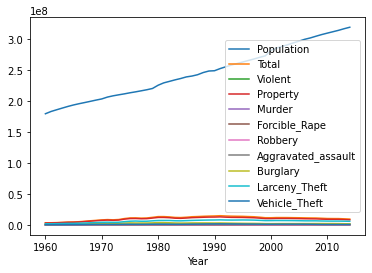

In [9]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas.

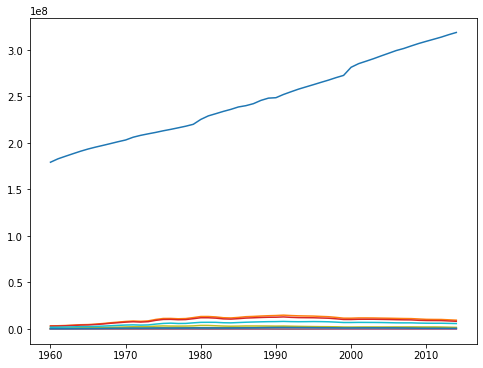

In [19]:
import matplotlib.pyplot as plt
#df.set_index("Year", inplace=True)
fig = plt.figure()

plt.plot(df)
fig.set_figheight(6)
fig.set_figwidth(8)
plt.show()

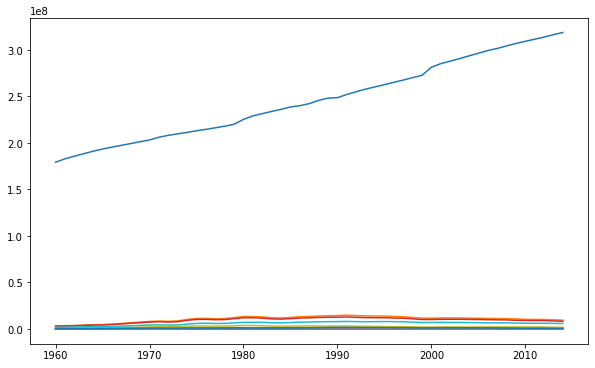

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df)
plt.show()


A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación?

In [21]:
df = df.drop(["Population",  "Total"], axis= 1)


<AxesSubplot:>

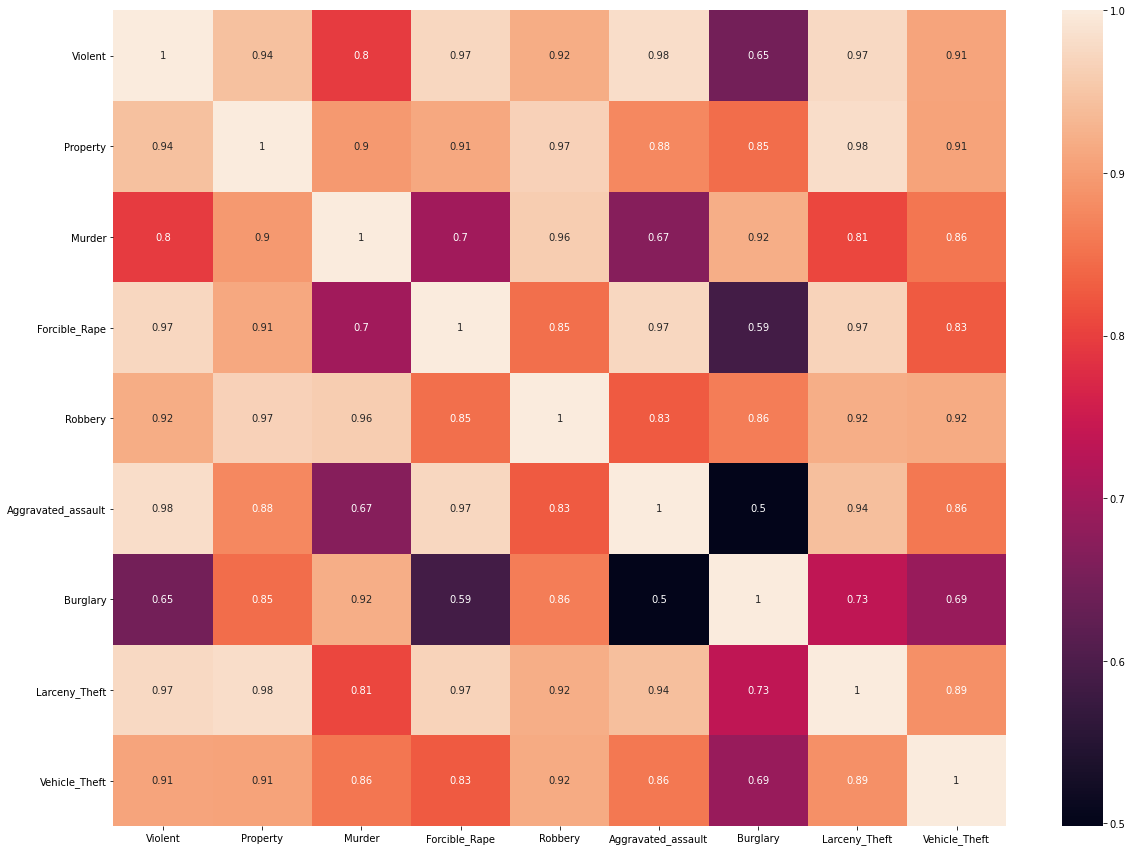

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot = True)


In [32]:
import pandas as pd
import numpy as np 
corr_mat = df.corr()


upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values(ascending=False)
print(f'Las columnas con mayor correlacion son \n{sorted_mat}')

Las columnas con mayor correlacion son 
Aggravated_assault  Violent               0.981071
Larceny_Theft       Property              0.980528
                    Violent               0.974791
Aggravated_assault  Forcible_Rape         0.974379
Forcible_Rape       Violent               0.973914
Larceny_Theft       Forcible_Rape         0.967417
Robbery             Property              0.965363
                    Murder                0.960156
Property            Violent               0.943351
Larceny_Theft       Aggravated_assault    0.941906
                    Robbery               0.920460
Burglary            Murder                0.920207
Robbery             Violent               0.919249
Vehicle_Theft       Robbery               0.916280
Forcible_Rape       Property              0.912517
Vehicle_Theft       Violent               0.909182
                    Property              0.906130
Murder              Property              0.895641
Vehicle_Theft       Larceny_Theft         

A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [35]:
df.columns

Index(['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
       'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [67]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')



In [49]:
X = df.drop(['Violent',  'Forcible_Rape', 'Aggravated_assault', 'Burglary'], axis=1)
print(X.shape)

y = df['Murder']
y = np.array(y).reshape(-1, 1)
print(y.shape)

(55, 5)
(55, 1)


In [55]:
seed = 7 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [60]:
degree = 6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)


In [ ]:
 Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [69]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)



In [74]:
#VALIDACION CRUZADA: 
name='Non Linear Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) 
cv_results = model_selection.cross_val_score(lin_reg_model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results) 
print("----------")
print(msg) 
print("----------")
print("y_pred", y_pred.shape)
print("----------")
print("MAE train:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
print("----------")
#print("MAE train:", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print("----------")
print("Score:", r2_score(y_train, y_pred))
print("----------")
#print("score test:",lin_reg_model.score(X_test, y_test))


[nan nan nan nan nan nan nan nan nan nan]
----------
Non Linear Regression: nan +- (nan)
----------
y_pred (44, 1)
----------
MAE train: 3.7657814366618616e-05
----------


ValueError: Found input variables with inconsistent numbers of samples: [11, 44]

In [ ]:
print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))
#print("score entrenamiento:",model.score(X_poly, y_train))
print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
print("score test:",lin_reg_model.score(X_test, y_test))

################
[[1.00000000e+00 3.09570000e+06 9.11000000e+03 ... 3.99419636e+34
  7.06529721e+33 1.24977393e+33]
 [1.00000000e+00 9.11262500e+06 1.47720000e+04 ... 1.15168343e+37
  1.37276314e+36 1.63628180e+35]
 [1.00000000e+00 1.17227000e+07 2.06130000e+04 ... 1.18264026e+38
  1.99487829e+37 3.36496188e+36]
 ...
 [1.00000000e+00 9.76791500e+06 1.64420000e+04 ... 3.66535039e+37
  5.33346485e+36 7.76074435e+35]
 [1.00000000e+00 1.04374800e+07 1.60370000e+04 ... 1.14529313e+38
  1.98366443e+37 3.43573576e+36]
 [1.00000000e+00 6.74900000e+06 1.47600000e+04 ... 9.00644927e+36
  2.03470804e+36 4.59674693e+35]]
(44, 462)
y_pred (44, 1)
Score: 0.9999999999999993
MAE: 9.64194475934412e-05


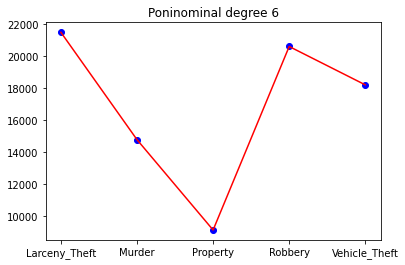

################
[[1.00000000e+00 3.09570000e+06 9.11000000e+03 ... 1.31089524e+40
  2.31883055e+39 4.10175803e+38]
 [1.00000000e+00 9.11262500e+06 1.47720000e+04 ... 8.51744753e+42
  1.01524757e+42 1.21013675e+41]
 [1.00000000e+00 1.17227000e+07 2.06130000e+04 ... 1.44771370e+44
  2.44200432e+43 4.11917434e+42]
 ...
 [1.00000000e+00 9.76791500e+06 1.64420000e+04 ... 3.51371118e+43
  5.11281408e+42 7.43967460e+41]
 [1.00000000e+00 1.04374800e+07 1.60370000e+04 ... 1.40686778e+44
  2.43671553e+43 4.22042689e+42]
 [1.00000000e+00 6.74900000e+06 1.47600000e+04 ... 7.91216568e+42
  1.78749101e+42 4.03824218e+41]]
(44, 792)
y_pred (44, 1)
Score: 0.999999999999963
MAE: 0.0005798345751331494


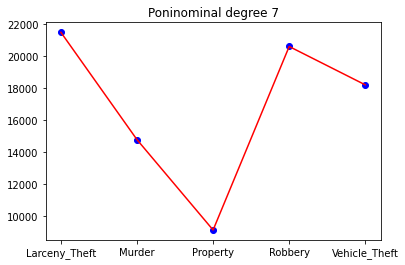

################
[[1.00000000e+00 3.09570000e+06 9.11000000e+03 ... 4.30235819e+45
  7.61040185e+44 1.34619699e+44]
 [1.00000000e+00 9.11262500e+06 1.47720000e+04 ... 6.29920608e+48
  7.50841568e+47 8.94974785e+46]
 [1.00000000e+00 1.17227000e+07 2.06130000e+04 ... 1.77219990e+50
  2.98934785e+49 5.04243372e+48]
 ...
 [1.00000000e+00 9.76791500e+06 1.64420000e+04 ... 3.36834543e+49
  4.90129185e+48 7.13188782e+47]
 [1.00000000e+00 1.04374800e+07 1.60370000e+04 ... 1.72818372e+50
  2.99323943e+49 5.18433440e+48]
 [1.00000000e+00 6.74900000e+06 1.47600000e+04 ... 6.95083755e+48
  1.57031085e+48 3.54759576e+47]]
(44, 1287)
y_pred (44, 1)
Score: 0.999999999999574
MAE: 0.002078216415983744


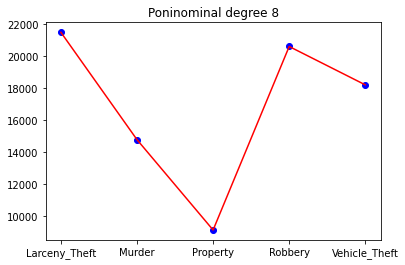

################
[[1.00000000e+00 3.09570000e+06 9.11000000e+03 ... 1.41203396e+51
  2.49773389e+50 4.41821851e+49]
 [1.00000000e+00 9.11262500e+06 1.47720000e+04 ... 4.65867234e+54
  5.55296144e+53 6.61892027e+52]
 [1.00000000e+00 1.17227000e+07 2.06130000e+04 ... 2.16941547e+56
  3.65937130e+55 6.17262969e+54]
 ...
 [1.00000000e+00 9.76791500e+06 1.64420000e+04 ... 3.22899362e+55
  4.69852050e+54 6.83683449e+53]
 [1.00000000e+00 1.04374800e+07 1.60370000e+04 ... 2.12288533e+56
  3.67686838e+55 6.36838972e+54]
 [1.00000000e+00 6.74900000e+06 1.47600000e+04 ... 6.10631079e+54
  1.37951809e+54 3.11656287e+53]]
(44, 2002)
y_pred (44, 1)
Score: 0.999999999995968
MAE: 0.006935672216307218


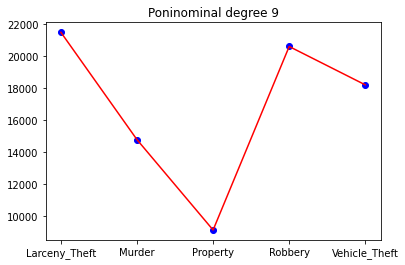

################
[[1.00000000e+00 3.09570000e+06 9.11000000e+03 ... 4.63429545e+56
  8.19756262e+55 1.45005931e+55]
 [1.00000000e+00 9.11262500e+06 1.47720000e+04 ... 3.44539101e+60
  4.10677593e+59 4.89512177e+58]
 [1.00000000e+00 1.17227000e+07 2.06130000e+04 ... 2.65566174e+62
  4.47957181e+61 7.55614439e+60]
 ...
 [1.00000000e+00 9.76791500e+06 1.64420000e+04 ... 3.09540692e+61
  4.50413801e+60 6.55398781e+59]
 [1.00000000e+00 1.04374800e+07 1.60370000e+04 ... 2.60773323e+62
  4.51663203e+61 7.82287262e+60]
 [1.00000000e+00 6.74900000e+06 1.47600000e+04 ... 5.36439403e+60
  1.21190664e+60 2.73790048e+59]]
(44, 3003)
y_pred (44, 1)
Score: 0.999999999999321
MAE: 0.00337515202462865


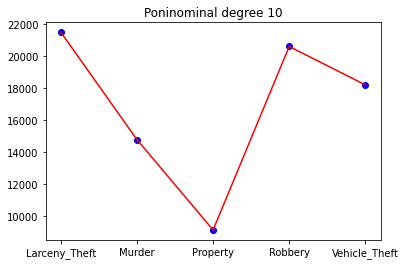

In [54]:

degree_min = 6
degree_max = 10
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train, y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    